In [1]:
import pandas as pd
import glob
import matplotlib.pyplot as plt
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import seaborn as sns
import math
import statistics
import warnings
import numpy as  np
import ast
warnings.filterwarnings('ignore')
data_files = glob.glob(r'../Squircle experiment/data/*.json')
# Load the dataset
df = pd.DataFrame()
for i in range(len(data_files)):
    temp_df = pd.read_json(data_files[i])
    df = pd.concat([df, temp_df])
df = df.drop(df.columns[df.columns.str.contains('Unnamed', case=False)], axis=1)
# select only the main task
df = df[(df['block_number'] != 'Training')]

# extracting sample size
n = len(set(df.pt_num))

In [2]:
df_acc = df[(df['difficulty'] != 'Control') & (df['acc'] != 'Control') & (df['acc'] != 'NAN')]

# Convert 'acc' column to 1 for True and 0 for False
df_acc['acc'] = df_acc['acc'].astype(int)

# Calculate average accuracy and reaction time by difficulty level
avg_stats = df_acc.groupby(['difficulty', 'true_value'] ).agg({'acc': 'mean', 'rt': 'mean'}).reset_index()
print(avg_stats)

  difficulty true_value       acc        rt
0       Easy       Blue  0.871795  0.443512
1       Easy        Red  0.896552  0.418634
2       Hard       Blue  0.674074  0.444458
3       Hard        Red  0.709497  0.431591
4     Medium       Blue  0.764599  0.443189
5     Medium        Red  0.834520  0.423815


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


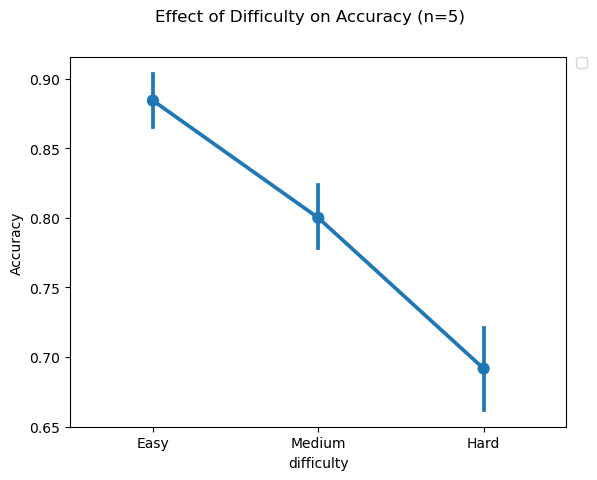

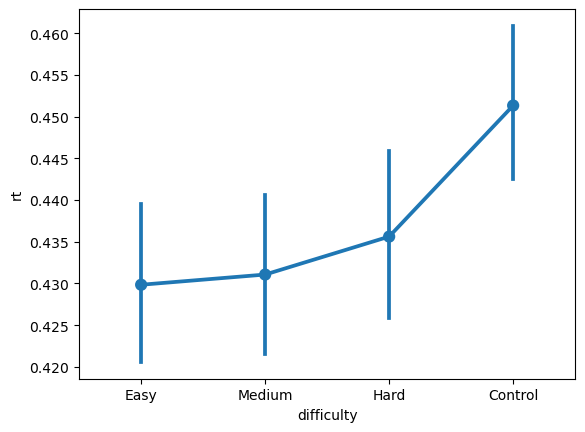

In [3]:
import pandas as pd

# Load the dataset
# Exclude rows where 'control' appears in either 'difficulty' or 'acc' column

df_acc = df[(df['difficulty'] != 'Control') & (df['acc'] != 'Control') & (df['acc'] != 'NAN')]



# Convert 'acc' column to 1 for True and 0 for False
df_acc['acc'] = df_acc['acc'].astype(int)

# Drop the 'Unnamed: 0' column
df = df.drop('Unnamed: 0', axis=1, errors='ignore')

# checking the effect of masking
# for each measure of performance separately
for dv in ['acc']:
    if dv == 'rt':
        data = df[df['acc'] == 1]  # only take correct trials for RT
    elif dv == 'acc':
        data = df_acc

    # Rest of your analysis code
    plt.figure()
    plot = sns.pointplot(
        data=data,
        y=dv,
        x='difficulty',
        order=['Easy', 'Medium', 'Hard'],
        join=True

    )
    if dv == 'acc':
        plt.ylabel("Accuracy")
        plt.suptitle("Effect of Difficulty on Accuracy (n={})".format(n))
    elif dv == 'rt':
        plt.ylabel("Reaction Time")
        plt.suptitle("Effect of Difficulty on Reaction Time (n={})".format(n))
    plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
    plt.show()

plt.figure()
plot = sns.pointplot(
    data=df[(df['acc'] == True) | (df['acc'] == 'Control')],
    y='rt',
    x='difficulty',
    order=['Easy', 'Medium', 'Hard', "Control"],
    join=True

)

In [4]:
df = df[(df['block_number'] != 'Training')]
df = df.reset_index()
#part below is necessary if you are reading it from csv or xlsx file not for pkl or json
"""
error_tri = []
for i in range(len(df)):
    try:
        df['traj_record'].iloc[i] = ast.literal_eval(df['traj_record'].iloc[i])
    except (ValueError, SyntaxError) as e:
        error_tri.append(i)
        print(f"Error at index {i}: {e}")
        continue
"""
# Now, 'traj_record' column contains lists of tuples
    
# Now, 'traj_record' column contains lists of tuples
df_blue = df[df['choice'] == 'Blue']
df_red = df[df['choice'] == 'Red']
df_blue = df_blue.reset_index()
df_red = df_red.reset_index()

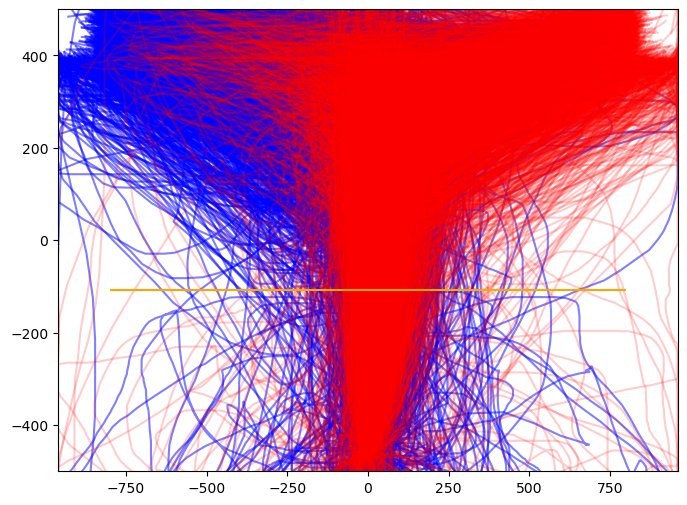

In [5]:

plt.figure(figsize=(8, 6))
for z in range(len(df_blue)):
#    if z == 88 or z == 99 or z == 127 or z == 195 or z == 210 or z == 247 or z == 279 or z ==339 or z == 457:
#        continue
    x_coords = [pos[0] for pos in df_blue['traj_record'][z]]
    y_coords = [pos[1] for pos in df_blue['traj_record'][z]]

    plt.plot(x_coords, y_coords, label='Mouse Trajectory', color='blue',alpha = 0.5)

for b in range(len(df_red)):
    x_red_coords = [pos[0] for pos in df_red['traj_record'][b]]
    y_red_coords = [pos[1] for pos in df_red['traj_record'][b]]
    
    # Create a new figure
   
    
    # Plot the mouse trajectory
   
    plt.plot(x_red_coords, y_red_coords, label='Mouse Trajectory', color='red', alpha = 0.2)
    #plt.scatter(x_coords, y_coords, color='red', s=4, label='Mouse Positions')
    
    
    # Add labels and title
    #plt.xlabel('X Position')
    #plt.ylabel('Y Position')
    #plt.title('Mouse Trajectory')
    
    # Set x-axis limits to show the left side of the screen
    
plt.xlim(-960, 960)
plt.ylim(-500, 500)  # Assuming max(x_coords) is the rightmost position
plt.hlines(-108, xmin = -800 , xmax =800, colors= 'orange')
# Add legend
#plt.legend()

# Show the plot
plt.show()


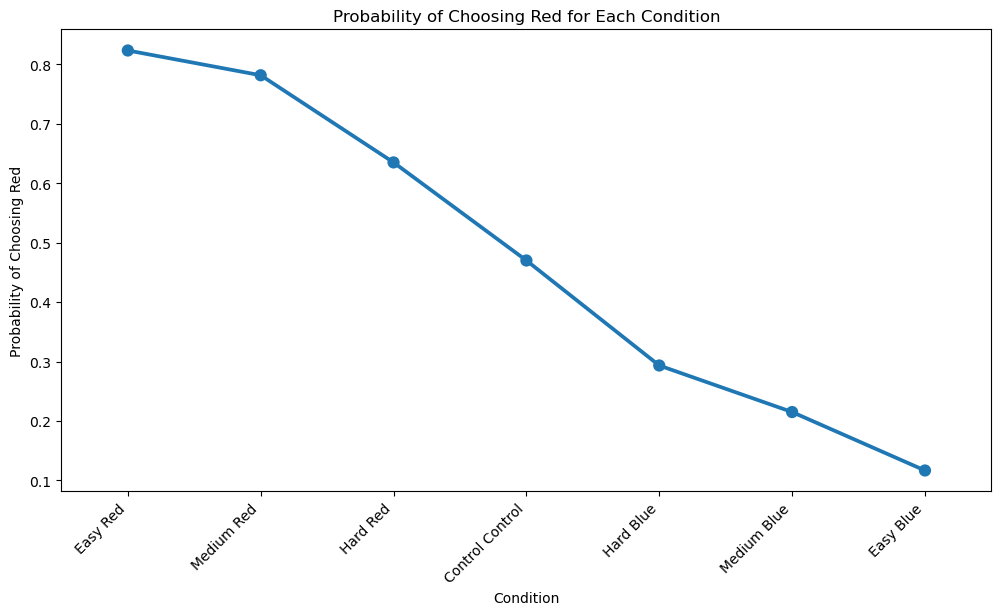

In [6]:
conditions = [
    ('Easy', 'Red'),
    ('Medium', 'Red'),
    ('Hard', 'Red'),
    ('Control', 'Control'),
    ('Hard', 'Blue'),
    ('Medium', 'Blue'),
    ('Easy', 'Blue')
]

plt.figure(figsize=(12, 6))

subset_data_list = []

for i, (difficulty, true_color) in enumerate(conditions, 1):
    subset_data = df[(df['difficulty'] == difficulty) & (df['true_value'] == true_color)]
    probabilities = subset_data['choice'].value_counts(normalize=True).get('Red', 0)
    
    subset_data_list.append({'Condition': f'{difficulty} {true_color}', 'Probability of Red': probabilities})

# Create a DataFrame from the list
plot_data = pd.DataFrame(subset_data_list)

# Plotting using sns.barplot
sns.pointplot(x='Condition', y='Probability of Red', data=plot_data, order=[c[0] + ' ' + c[1] for c in conditions])
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.title('Probability of Choosing Red for Each Condition')
plt.xlabel('Condition')
plt.ylabel('Probability of Choosing Red')
plt.show()

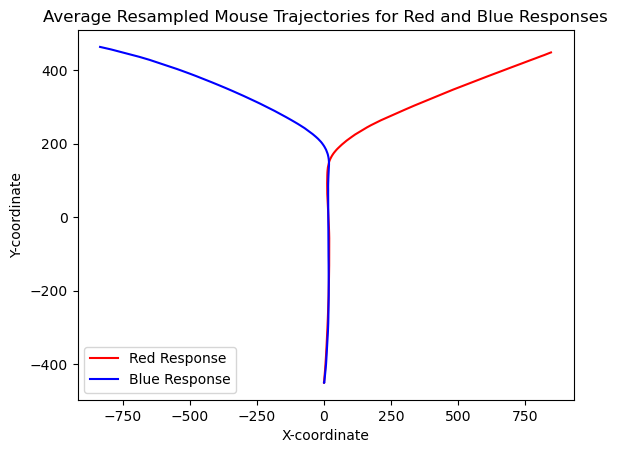

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Example data (replace with your actual data)
#red_trajectories = [...]  # List of mouse trajectories for red responses
red_trajectories = df_red['traj_record'] # List of mouse trajectories for red responses
blue_trajectories = df_blue['traj_record']  # List of mouse trajectories for blue responses
# Find the maximum length of trajectories
max_length = max(len(traj) for traj in red_trajectories)

# Initialize an array to store the resampled trajectories
resampled_red_trajectories = []

# Resample each trajectory to have the same length
for traj in red_trajectories:
    x, y = zip(*traj)
    x = np.array(x)
    y = np.array(y)
    new_x = np.linspace(0, len(traj) - 1, max_length)
    resampled_traj_x = np.interp(new_x, np.arange(len(traj)), x)
    resampled_traj_y = np.interp(new_x, np.arange(len(traj)), y)
    resampled_traj = list(zip(resampled_traj_x, resampled_traj_y))
    resampled_red_trajectories.append(resampled_traj)

# Convert the list of resampled trajectories to a numpy array
resampled_red_trajectories = np.array(resampled_red_trajectories)

# Compute the average resampled trajectory for red responses
red_average_trajectory = np.mean(resampled_red_trajectories, axis=0)


# Find the maximum length of trajectories
max_length = max(len(traj) for traj in blue_trajectories)

# Initialize an array to store the resampled trajectories
resampled_blue_trajectories = []

# Resample each trajectory to have the same length
for traj in blue_trajectories:
    x, y = zip(*traj)
    x = np.array(x)
    y = np.array(y)
    new_x = np.linspace(0, len(traj) - 1, max_length)
    resampled_traj_x = np.interp(new_x, np.arange(len(traj)), x)
    resampled_traj_y = np.interp(new_x, np.arange(len(traj)), y)
    resampled_traj = list(zip(resampled_traj_x, resampled_traj_y))
    resampled_blue_trajectories.append(resampled_traj)

# Convert the list of resampled trajectories to a numpy array
resampled_blue_trajectories = np.array(resampled_blue_trajectories)

# Compute the average resampled trajectory for blue responses
blue_average_trajectory = np.mean(resampled_blue_trajectories, axis=0)

# Plot the average resampled trajectory for red and blue responses
plt.plot(red_average_trajectory[:, 0], red_average_trajectory[:, 1], label='Red Response', color='red')
plt.plot(blue_average_trajectory[:, 0], blue_average_trajectory[:, 1], label='Blue Response', color='blue')

# Customize the plot as needed
plt.title('Average Resampled Mouse Trajectories for Red and Blue Responses')
plt.xlabel('X-coordinate')
plt.ylabel('Y-coordinate')
plt.legend()
plt.show()